# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 11. Supervised Classification</u></b><center>

## **DATASET INFORMATION**

+ According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

+ The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

_**But, what are the causes for these delays?**_

+ In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008.


-----------



+ **Year** 2008
+ **Month** 1-12
+ **DayOfMonth** 1-31
+ **DayOfWeek** 1 (Monday) - 7 (Sunday)
+ **DepTime** actual departure time (local, hhmm)
+ **CRSDepTime** scheduled departure time (local, hhmm)
+ **ArrTime** actual arrival time (local, hhmm)
+ **CRSArrTime** scheduled arrival time (local, hhmm)
+ **UniqueCarrier** unique carrier code
+ **FlightNum** flight number
+ **TailNum** plane tail number: aircraft registration, unique aircraft identifier
+ **ActualElapsedTime** in minutes
+ **CRSElapsedTime** in minutes
+ **AirTime** in minutes
+ **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ **DepDelay** departure delay, in minutes
+ **Origin** origin IATA airport code
+ **Dest** destination IATA airport code
+ **Distance** in miles
+ **TaxiIn** taxi in time, in minutes
+ **TaxiOut** taxi out time in minutes
+ **Cancelled** was the flight cancelled
+ **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ **Diverted** 1 = yes, 0 = no
+ **CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ **WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ **NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ **SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [117]:
# Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [118]:
# CSV. This dataset has been cleaned in the previous task and now we import it to work classifications

airlines = pd.read_csv('./clean_airlines_df.csv')
pd.set_option('display.max_columns', None)
airlines = airlines.drop(['Unnamed: 0'], axis = 1)
airlines.head()

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,0,0,628,620,804.0,750,448,96.0,90.0,76.0,14.0,8,515,0,0,0,0,0
3,2008-01-03,WN,IND,BWI,0,0,1829,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34,515,2,0,0,0,32
4,2008-01-03,WN,IND,JAX,0,0,1940,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25,688,0,0,0,0,0


In [119]:
# Shape
airlines.shape

(1936758, 22)

In [120]:
# DateTime
airlines = airlines.astype({'FlightDate_USA': pd.DatetimeTZDtype(tz = 'UTC')})

# Create new columns
airlines['Day'] = airlines['FlightDate_USA'].dt.day
airlines['Month'] = airlines['FlightDate_USA'].dt.month
airlines['Year'] = airlines['FlightDate_USA'].dt.year

In [121]:
# Changing the position of the date columns
day_column = airlines.pop('Day')
month_column = airlines.pop('Month')
year_column = airlines.pop('Year')

# Insert the columns to desired place
airlines.insert(1, 'Day', day_column)
airlines.insert(2, 'month', month_column)
airlines.insert(3, 'year', year_column)

In [122]:
# Missings
round((airlines.isna().sum())/len(airlines)*100,2)

FlightDate_USA       0.00
Day                  0.00
month                0.00
year                 0.00
UniqueCarrier        0.00
Origin               0.00
Dest                 0.00
Cancelled            0.00
Diverted             0.00
DepTime              0.00
CRSDepTime           0.00
ArrTime              0.37
CRSArrTime           0.00
FlightNum            0.00
ActualElapsedTime    0.43
CRSElapsedTime       0.01
AirTime              0.43
ArrDelay             0.43
DepDelay             0.00
Distance             0.00
CarrierDelay         0.00
WeatherDelay         0.00
NASDelay             0.00
SecurityDelay        0.00
LateAircraftDelay    0.00
dtype: float64

In [123]:
# Diverted and cancelled variables (are the cause of our missings)
print(airlines['Cancelled'].value_counts(), '\n', airlines['Diverted'].value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64 
 0    1929004
1       7754
Name: Diverted, dtype: int64


+ THE SUM OF **'CANCELED'** AND **'DIVERTED'** FLIGHTS GIVES US THE NUMBER OF MISSINGS FOR THE VARIABLES **'ACTUALELAPSEDTIME'**, **'AIRTIME'** AND **'ARRDELAY'**, WHERE THERE ARE NO RECORDS BECAUSE THE FLIGHTS NEVER ARRIVED AT THE DESTINATION. THEY ARE A VERY LOW PERCENTAGE OF THE SIZE OF THE DATASET (< 1%), FOR THAT REASON, WE WILL PROCEED TO ELIMINATE THEM. IF WE ELIMINATE THE MISSINGS, **CANCELED** AND **DIVERTED** VARIABLES WILL NOT HAVE ANY USE IN OUR SET AND THEREFORE WE ALSO ELIMINATE THEM.

In [124]:
# Drop NaNs
airlines.dropna(inplace=True)

In [125]:
# Remove useless columns
airlines.drop(['FlightDate_USA','year','Cancelled','Diverted','FlightNum'], axis = 1, inplace= True)

In [126]:
# Removing duplicates
airlines.drop_duplicates(inplace=True)

In [127]:
# Labels
labels = ['UniqueCarrier', 'Origin', 'Dest']

# To category and  Label Encoder (We transform the categorical variables to numeric)
for category in labels:
    airlines[category] = airlines[category].astype('category')
    category_map = airlines.groupby(category).size()/len(airlines)*100  # give a weight depending on the importance of the category
    airlines[category] = airlines[category].map(category_map)

WE WANT TO INTRODUCE THE CATEGORICAL VARIABLES INSIDE THE MODEL, SO WE HAVE CONVERTED THE CATEGORICAL VARIABLES TO NUMERICAL(**LABEL ENCODER**). THE METHOD WE HAVE APPLIED HAS BEEN TO GIVE MORE WEIGHT TO THOSE FLIGHTS THAT HAVE A HIGHER PERCENTAGE OF FLIGHTS BY 'UNIQUECARRIER', 'ORIGIN' OR 'DEST'.

APPLYING THE **HOT ENCODER** WOULD HAVE RESULTED IN A VERY HIGH INCREASE IN THE NUMBER OF VARIABLES AND IT IS NOT WHAT WE WANTED.

LINK: https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/


In [128]:
# We will reduce the dataset with a sample of 20.000
airlines = airlines.sample(n = 20000, random_state=42)

## **EXERCISE 1**

**STATEMENT:** Group the different flights using **K-means algorithm**.

In [129]:
# K-Means Function

def kmeans_function(data, k):
    global kmeans
    # K-Means Parameters
    kmeans_kwargs = {'init': 'random','n_init':10,'max_iter': 300,'random_state': 42}

    # K-Means method
    kmeans = KMeans(n_clusters= k , **kmeans_kwargs)
    kmeans.fit(data)

    # Elbow method
    sum_square_error.append(kmeans.inertia_)
    # Silhouette coefficients
    if k>=2:
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)


FIRST OF ALL WE WILL APPLY A **PRE-PROCESSING** STANDARDIZING THE DATA SET AND APPLYING THE **PCA** METHOD TO REDUCE THE NUMBER OF VARIABLES, BUT MAINTAINING THE VARIANCE.

### **PRINCIPAL ANALYSIS COMPONENTS (PCA)**

LET'S SEE HOW MANY COMPONENTS ARE NECESSARY IN OUR DATA SET TO KEEP THE VARIANCE AS HIGH AS POSSIBLE.

In [130]:
# PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(airlines)

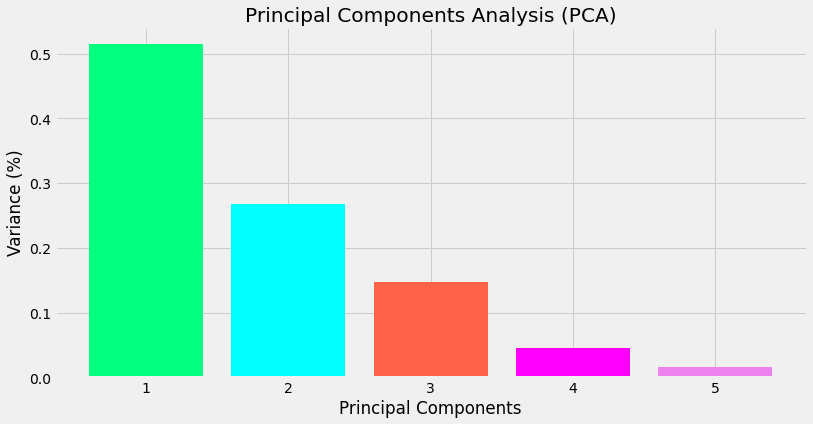

In [131]:
# Plot
plt.figure(figsize=(12,6))
colors = ['springgreen', 'cyan', 'tomato', 'fuchsia', 'violet']
plt.bar(range(1,6), pca.explained_variance_ratio_, color = colors)
plt.xlabel('Principal Components'); plt.ylabel('Variance (%)'); plt.title('Principal Components Analysis (PCA)');plt.show()

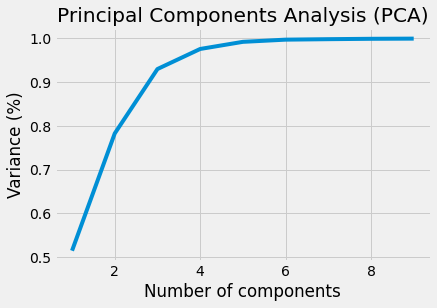

In [132]:
# Another way to decide the number of components

explained_variance = []

for i in range(1,10):
    pca = PCA(n_components=i)
    pca.fit(airlines)
    explained_variance.append(np.sum(pca.explained_variance_ratio_)) # Accumulative 

# plot
plt.plot(range(1,10), explained_variance)
plt.xlabel('Number of components'); plt.ylabel('Variance (%)'); plt.title('Principal Components Analysis (PCA)');plt.show()

In [133]:
# PCA Variance
pca.explained_variance_ratio_.round(3)

array([0.515, 0.268, 0.147, 0.046, 0.016, 0.005, 0.001, 0.001, 0.   ])

IF WE SELECT **3 COMPONENTS** (PCA) WE WILL BE ABLE TO MAINTAIN 93% OF THE VARIANCE.

### **CLUSTERS**

### **ELBOW METHOD**

OUR OBJECTIVE IS TO FIND THE **OPTIMUM NUMBER OF CLUSTERS**. THE OPTIMUM VALUE IS REACHED FROM MAINTAINING A COMPENSATION BETWEEN THE ERROR AND THE NUMBER OF CLUSTERS 'K'.

In [134]:
# Elbow Method and Silhouette Coefficient

sum_square_error = []
silhouette_coefficients = []

for k in range(1,11):
    kmeans_function(airlines, k)

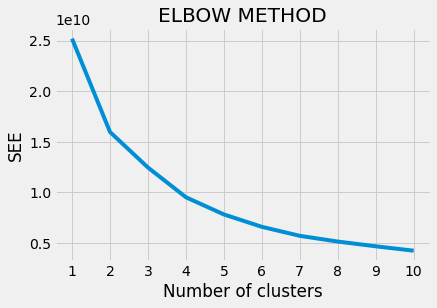

In [135]:
# Plot
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sum_square_error)
plt.xlabel('Number of clusters'); plt.title('ELBOW METHOD');plt.xticks(range(1, 11)) ;plt.ylabel('SEE'); plt.show()

In [136]:
# We can identify the elbow point with a function
kl = KneeLocator(range(1,11), sum_square_error, curve = 'convex', direction = 'decreasing')
print('The perfect number of clusters is: ',kl.elbow)

The perfect number of clusters is:  4


### **SILHOUETTE COEFFICIENT**

It quantifies how well an observation fits into its assigned group based on two factors:

+ How close the data is to the other data in the same cluster

+ How far is the data from the data of other clusters

Silhouette coefficient values range from -1 to 1. Larger numbers indicate that samples are closer to their clusters than to other clusters.

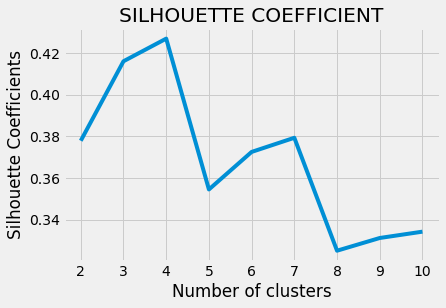

In [137]:
# Plot
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients)
plt.xlabel('Number of clusters');plt.title('SILHOUETTE COEFFICIENT'); plt.xticks(range(2, 11)); plt.xticks(range(2, 11)) ;plt.ylabel('Silhouette Coefficients'); plt.show()

THROUGH THE **SILHOUETTE COEFFICINET** IT TELL US THAT THE OPTIMAL NUMBER OF CLUSTERS IS ALSO **4**.

ONCE WE ARE CLEAR ON THE NUMBER OF COMPONENTS AND THE NUMBER OF CLUSTERS WE WILL USE, IT IS TIME TO PERFORM THE **PREPROCESSING** AND APPLY THE CORRESPONDING **ALGORITHM**

### **PIPELINE**

WE WILL USE **PIPELINE** FOR DATA PRE-PROCESSING AND TO APPLY THE DIFFERENT CLUSTERING ALGORITHMS:

+ K-MEANS
+ HIREARCHICAL CLUSTERING

## **K-MEANS**

### **PCA2**

In [138]:

def pipelines(data, i):
    # Preprocessing
    preprocessing = Pipeline([
        ('pca', PCA(n_components = i, random_state=42))
    ])

    # K-means
    clusterer = Pipeline([
        ('kmeans', KMeans(n_clusters=kl.elbow, init = 'k-means++', n_init = 50, max_iter= 500, random_state = 42))
    ])

    # Join Pipelines
    pipe = Pipeline([
        ('preprocessing', preprocessing),
        ('clusterer', clusterer)
    ])

    return pipe.fit(data)

In [139]:
# Pipeline to the data
pipe_pca_2 = pipelines(airlines, 2)
pipe_pca_2

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [140]:
# DataFrame
pca2_airlines_df = pd.DataFrame(pipe_pca_2['preprocessing'].transform(airlines), columns = ['PCA1', 'PCA2'])

# Predicted cluster
pca2_airlines_df['predicted_cluster'] = pipe_pca_2['clusterer']['kmeans'].labels_

pca2_airlines_df.head()

,PCA1,PCA2,predicted_cluster
0,-900.216650,-494.410171,2
1,441.055807,352.221017,1
2,511.578596,-262.589171,1
3,-980.575524,-103.211522,2
4,-610.426208,-256.089098,2


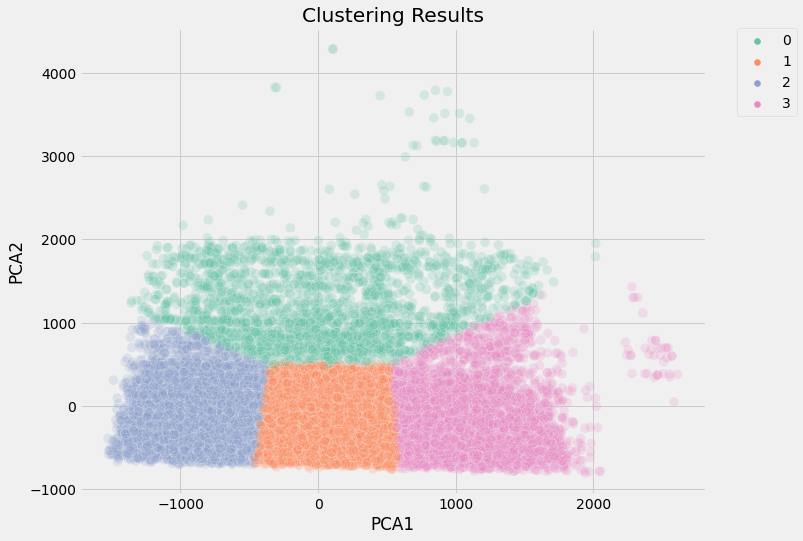

In [141]:
# Plot 2 dimensional 
plt.style.use('fivethirtyeight')
plt.figure(figsize= (10,8))

scatter = sns.scatterplot(x = 'PCA1', y = 'PCA2', s= 100, data = pca2_airlines_df, hue = 'predicted_cluster', palette = 'Set2', alpha = 0.2)
scatter.set_title("Clustering Results")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

THE OPTIMAL NUMBER OF PCA ACCORDING TO THE DATA IS 3 COMPONENTS BUT WE ARE GOING TO MAKE A FIRST APPROXIMATION WITH ONLY 2 COMPONENTS. THE IMAGE SHOWS US THAT THE CLUSTERS ARE VERY CLOSE TO ONE OF THE OTHERS AND THE DISTANCES ARE VERY LITTLE MARKED. WE CAN SEE HOW THEY ARE NOT CLEARLY SEPARATE CLUSTERS.

### **PCA3**

In [142]:
# Pipeline to the data
pipe_pca_3 = pipelines(airlines, 3)
pipe_pca_3

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [143]:
# DataFrame
pca3_airlines_df = pd.DataFrame(pipe_pca_3['preprocessing'].transform(airlines), columns = ['PCA1', 'PCA2', 'PCA3'])

# Predicted cluster
pca3_airlines_df['predicted_cluster'] = pipe_pca_3['clusterer']['kmeans'].labels_
pca3_airlines_df.head()

,PCA1,PCA2,PCA3,predicted_cluster
0,-900.216650,-494.410171,58.254599,0
1,441.055807,352.221017,-269.214026,1
2,511.578596,-262.589171,-86.551545,1
3,-980.575524,-103.211522,15.073372,0
4,-610.426208,-256.089098,-112.304865,0


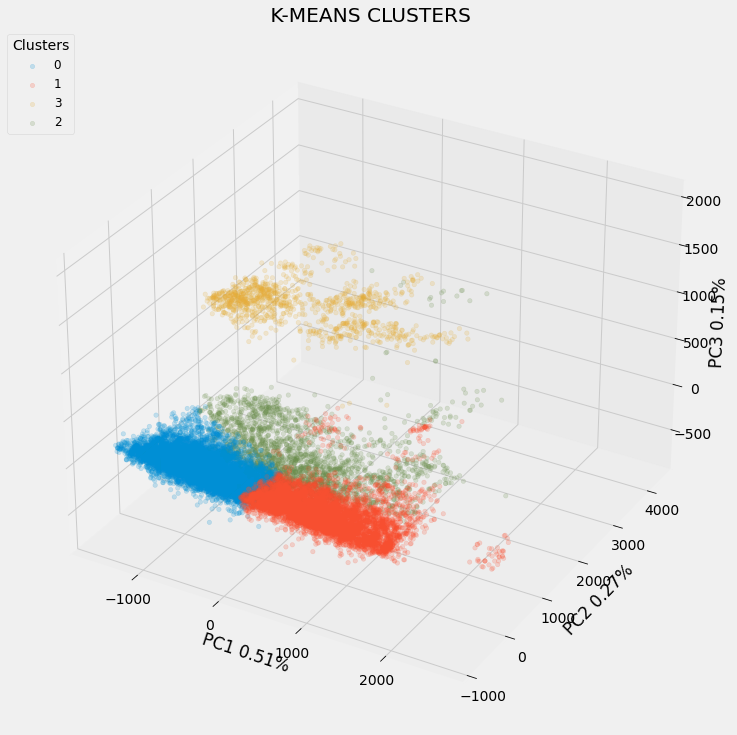

In [144]:
# Plot 3 dimensional 

# Frame
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection = '3d') 

for x in pca3_airlines_df.predicted_cluster.unique():
    ax.scatter(pca3_airlines_df.PCA1[pca3_airlines_df.predicted_cluster == x],
    pca3_airlines_df.PCA2[pca3_airlines_df.predicted_cluster == x],
    pca3_airlines_df.PCA3[pca3_airlines_df.predicted_cluster == x], label = x, alpha = 0.2)


ax.set(xlabel='PC1 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[0], 2))+"%",
          ylabel='PC2 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[1], 2))+"%",
          zlabel='PC3 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[2], 2))+"%",
          title= " K-MEANS CLUSTERS")
plt.legend(title="Clusters", fontsize=12,bbox_to_anchor=(0.09, 1))
plt.show()

ADDING THE NUMBER OF CLUSTERS AND OPTIMAL COMPONENTS WE CAN SEE THAT THE DIFFERENCES BETWEEN THEM ARE NOT CLEARLY MARKED. **CLUSTER NUMBER 3** IS THE ONE THAT IS MOST DIFFERENTIATED FROM THE REST. **CLUSTER NUMBER 0** WE COULD SAY THAT IT IS ON TOP OF CLUSTERS 1 AND 2.

In [145]:
# # Add PCAs and CLUSTER LABELS to the dataset
airlines_pca_kmeans = pd.concat([airlines.reset_index(drop=True), pca3_airlines_df], axis =1)
airlines_pca_kmeans.head()

,Day,month,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster
0,25,3,19.508766,0.894383,1.296536,1959,1950,2055.0,2050,56.0,60.0,44.0,5.0,9,251,0,0,0,0,0,-900.216650,-494.410171,58.254599,0
1,9,8,9.900076,4.929451,1.019566,1152,1130,1555.0,1520,183.0,170.0,153.0,35.0,22,1121,22,0,13,0,0,441.055807,352.221017,-269.214026,1
2,13,12,4.239956,0.113464,5.524876,1226,1210,1405.0,1355,99.0,105.0,79.0,10.0,16,528,0,0,0,0,0,511.578596,-262.589171,-86.551545,1
3,21,1,19.508766,3.839099,2.520731,2046,1950,2158.0,2045,132.0,115.0,103.0,73.0,56,629,7,0,17,0,49,-980.575524,-103.211522,15.073372,0
4,26,12,6.833754,3.839099,0.425230,1759,1709,2026.0,1937,87.0,88.0,71.0,49.0,50,495,0,0,0,0,49,-610.426208,-256.089098,-112.304865,0


In [146]:
# Cluster 0
cluster_0 = airlines_pca_kmeans.loc[airlines_pca_kmeans['predicted_cluster'] ==0]
cluster_0.describe()

,Day,month,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster
count,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.0
mean,15.594302,6.065540,2.294572,1.778316,1825.399523,1752.681616,2005.504496,1933.694616,110.541545,111.102914,85.355649,43.271260,43.832629,568.005200,10.232044,2.412848,10.741415,0.031308,18.527028,-646.692689,-177.388739,-49.579692,0.0
std,8.821915,3.418219,2.130258,1.659086,210.903286,211.130248,211.188390,214.323508,43.602697,41.249877,38.749583,50.698575,46.406451,308.401011,28.077946,15.261348,30.184460,0.759337,34.661938,402.736449,318.363322,84.816449,0.0
min,1.000000,1.000000,0.001711,0.000674,1326.000000,1131.000000,1538.000000,3.000000,26.000000,28.000000,13.000000,-40.000000,6.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1526.392085,-752.607708,-555.625841,0.0
25%,8.000000,3.000000,0.704844,0.529670,1645.000000,1600.000000,1831.000000,1750.000000,76.000000,78.000000,54.000000,11.000000,13.000000,316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-975.356227,-437.683491,-104.658918,0.0
50%,15.000000,6.000000,1.587041,1.176694,1826.000000,1740.000000,2019.000000,1930.000000,105.000000,105.000000,79.000000,27.000000,27.000000,528.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-645.605990,-226.023891,-37.388098,0.0
75%,23.000000,9.000000,2.933619,2.473230,2006.000000,1920.000000,2201.000000,2115.000000,141.000000,141.000000,113.000000,59.000000,56.000000,787.000000,6.000000,0.000000,7.000000,0.000000,24.000000,-314.601737,46.144583,13.745502,0.0
max,31.000000,12.000000,6.804351,5.614330,2354.000000,2305.000000,2400.000000,2359.000000,351.000000,265.000000,220.000000,650.000000,644.000000,1616.000000,644.000000,342.000000,396.000000,36.000000,394.000000,84.964416,922.685080,189.544615,0.0


In [147]:
# Cluster 1
cluster_1 = airlines_pca_kmeans.loc[airlines_pca_kmeans['predicted_cluster'] ==1]
cluster_1.describe()

,Day,month,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster
count,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.0
mean,15.719147,6.137638,2.141597,1.928122,1076.435783,1054.848975,1262.214196,1222.102915,111.972807,112.062195,88.068889,36.942965,37.032353,587.941849,14.334402,2.449310,7.918421,0.063171,10.463255,802.232537,-211.194585,-108.775220,1.0
std,8.706403,3.576951,2.100403,1.694148,275.111002,278.380685,269.201783,265.212833,46.429091,44.980210,43.225441,57.749427,54.918193,349.964468,42.960538,21.437335,23.028826,1.561049,29.647330,472.344634,357.303273,136.148304,0.0
min,1.000000,1.000000,0.001089,0.004045,1.000000,10.000000,14.000000,3.000000,27.000000,30.000000,13.000000,-28.000000,6.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.385876,-807.869496,-673.295265,1.0
25%,8.000000,3.000000,0.541701,0.608597,916.000000,850.000000,1103.000000,1033.000000,76.000000,76.000000,54.000000,8.000000,11.000000,309.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.248534,-494.153150,-169.942328,1.0
50%,16.000000,6.000000,1.477985,1.452264,1117.000000,1050.000000,1309.000000,1235.000000,105.000000,105.000000,80.000000,20.000000,20.000000,529.000000,0.000000,0.000000,0.000000,0.000000,0.000000,752.879324,-271.509372,-105.753081,1.0
75%,23.000000,9.000000,2.933619,2.877665,1307.000000,1237.000000,1454.000000,1423.000000,141.000000,141.000000,115.000000,46.000000,42.000000,812.500000,14.000000,0.000000,6.000000,0.000000,5.000000,1156.538236,23.375565,-54.975514,1.0
max,31.000000,12.000000,6.804351,5.614330,1813.000000,2359.000000,2143.000000,2359.000000,408.000000,297.000000,286.000000,1139.000000,1146.000000,2248.000000,1131.000000,876.000000,389.000000,67.000000,429.000000,2612.999046,1432.634160,954.290491,1.0


In [148]:
# Cluster 2
cluster_2 = airlines_pca_kmeans.loc[airlines_pca_kmeans['predicted_cluster'] ==2]
cluster_2.describe()

,Day,month,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.0
mean,15.620952,6.194322,2.566499,2.134818,1418.241903,1385.726509,1814.647741,1753.259496,259.436625,262.966813,232.297881,35.382647,38.912835,1816.479008,11.976809,1.576569,9.313475,0.034386,12.378249,-37.052814,1079.198676,-243.341230,2.0
std,8.792421,3.413711,1.836575,1.391031,376.807248,352.544975,349.514778,357.259065,64.571948,63.152350,61.542724,52.497622,47.686606,500.212447,31.828256,14.222638,25.013486,1.318642,31.389375,636.359968,508.659611,208.780107,0.0
min,1.000000,1.000000,0.028573,0.007882,1.000000,230.000000,245.000000,2.000000,138.000000,150.000000,121.000000,-45.000000,6.000000,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1357.840254,245.764727,-736.397166,2.0
25%,8.000000,3.000000,1.282794,1.050058,1204.000000,1135.000000,1620.000000,1548.000000,213.000000,220.000000,188.000000,4.000000,11.000000,1464.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-534.884957,716.454731,-381.885871,2.0
50%,16.000000,6.000000,2.262793,1.827140,1431.000000,1353.000000,1841.000000,1800.000000,248.000000,251.000000,221.000000,20.000000,22.000000,1739.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53.740480,992.733332,-215.397781,2.0
75%,23.000000,9.000000,3.035985,2.877665,1709.000000,1645.000000,2103.000000,2022.000000,301.000000,302.000000,272.000000,49.000000,47.000000,2139.000000,11.000000,0.000000,8.000000,0.000000,10.000000,381.390916,1409.201431,-114.484803,2.0
max,31.000000,12.000000,6.804351,5.614330,2335.000000,2359.000000,2400.000000,2359.000000,638.000000,635.000000,605.000000,484.000000,482.000000,4962.000000,482.000000,396.000000,434.000000,65.000000,367.000000,2018.832793,4287.715033,1248.230075,2.0


In [149]:
# Cluster 3
cluster_3 = airlines_pca_kmeans.loc[airlines_pca_kmeans['predicted_cluster'] ==3]
cluster_3.describe()

,Day,month,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0
mean,15.741112,6.131267,2.934505,1.687460,2159.440292,2031.170465,131.815861,1559.424795,180.178669,179.156791,150.511395,82.254330,81.232452,1176.879672,23.352780,5.379216,14.703737,0.200547,38.337284,282.114650,412.831294,1683.038880,3.0
std,8.925302,3.199723,1.993434,1.382113,195.293445,188.844694,195.840950,985.723279,83.872584,82.896608,80.582177,81.934882,78.624661,711.461405,54.931913,27.325529,37.520344,3.085739,59.565789,521.541138,703.771702,187.918589,0.0
min,1.000000,1.000000,0.015868,0.000674,6.000000,725.000000,1.000000,1.000000,30.000000,34.000000,15.000000,-57.000000,6.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-350.746827,-695.184347,756.161401,3.0
25%,8.000000,3.000000,1.510136,0.608597,2111.000000,1931.000000,21.000000,521.000000,116.000000,115.000000,85.000000,24.000000,25.000000,611.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-121.337019,-129.954802,1570.061861,3.0
50%,15.000000,6.000000,2.735783,1.532331,2211.000000,2055.000000,45.000000,2218.000000,164.000000,165.000000,137.000000,61.000000,60.000000,1028.000000,0.000000,0.000000,0.000000,0.000000,7.000000,61.433984,272.959349,1732.319742,3.0
75%,24.000000,8.000000,3.839099,2.424432,2302.000000,2145.000000,127.000000,2329.000000,239.000000,235.000000,203.000000,122.000000,115.000000,1619.000000,21.000000,0.000000,11.000000,0.000000,58.000000,603.916196,893.381565,1822.836994,3.0
max,31.000000,12.000000,6.804351,5.614330,2400.000000,2350.000000,838.000000,2359.000000,511.000000,413.000000,405.000000,648.000000,664.000000,3043.000000,633.000000,370.000000,358.000000,65.000000,648.000000,1665.245490,2256.011683,1978.431064,3.0


ANALYZING THE DIFFERENT CLUSTERS SEPARATELY WE CAN SEE HOW THEY HAVE DIFFERENT CHARACTERISTICS AND WE CAN DETECT BEHAVIOR PATTERNS THAT CAN HELP US WITH BUSINESS OBJECTIVES.

## **EXERCISE 2**

**STATEMENT:** Group the different flights using the hierarchical clustering algorithm.

### **HIREARCHICHAL CLUSTERING**

HOW WE COULD LABEL THE DATA USING HIREARCHICAL AGGLOMERATIVE CLUSTERING.

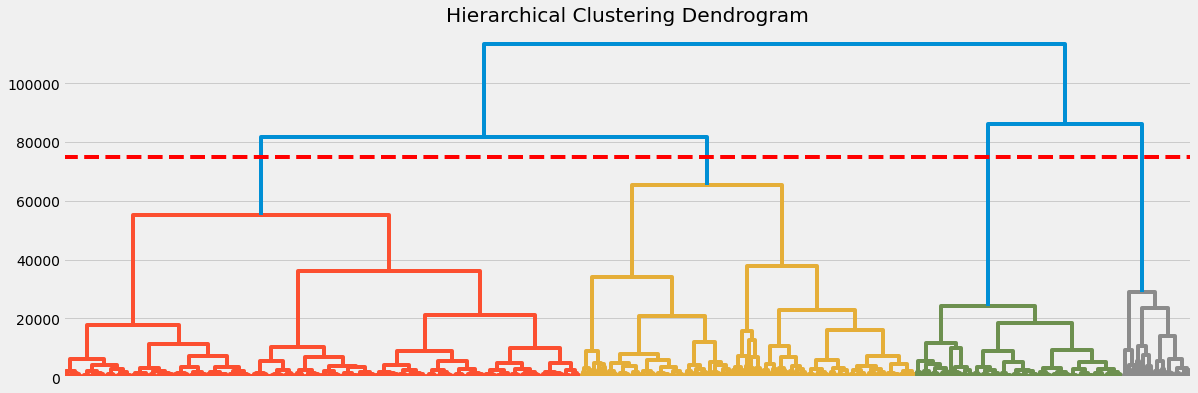

In [150]:
# Hirearchical clustering
plt.figure(figsize = (18,6))
plt.title('Hierarchical Clustering Dendrogram')
dendogram = sch.dendrogram(sch.linkage(airlines_pca_kmeans[['PCA1','PCA2','PCA3']], method = 'ward'), no_labels= True)
plt.axhline(y = 75000 , color = 'r', linestyle = '--'); plt.show()

THE RED LINE THAT CROSSES THE ENDOGRAM MARKS US THAT WE HAVE TO TAKE 4 CLUSTERS, BECAUSE THE MORE SEPARATE THE TREES ARE FROM ONE OF THE OTHERS, IT WANTS TO INDICATE THAT THE GROUPS ARE MORE DIFFERENTIATED. WE COULD HAVE DONE 2 CLUSTERS BUT WE HAVE SEEN THAT THERE IS A LOT OF DATA THAT IS DISTRIBUTED IN A DISPERSED WAY AND IT DOESN'T CATCH THE CLUSTERS WELL.

In [151]:
# 4 CLUSTERS

# Cluster using Agglomerative Hirearchical Clustering
clusters_4 = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
clusters_4.fit(airlines)
airlines_pca_kmeans['Agglomerative_Hireachical_4'] = clusters_4.labels_

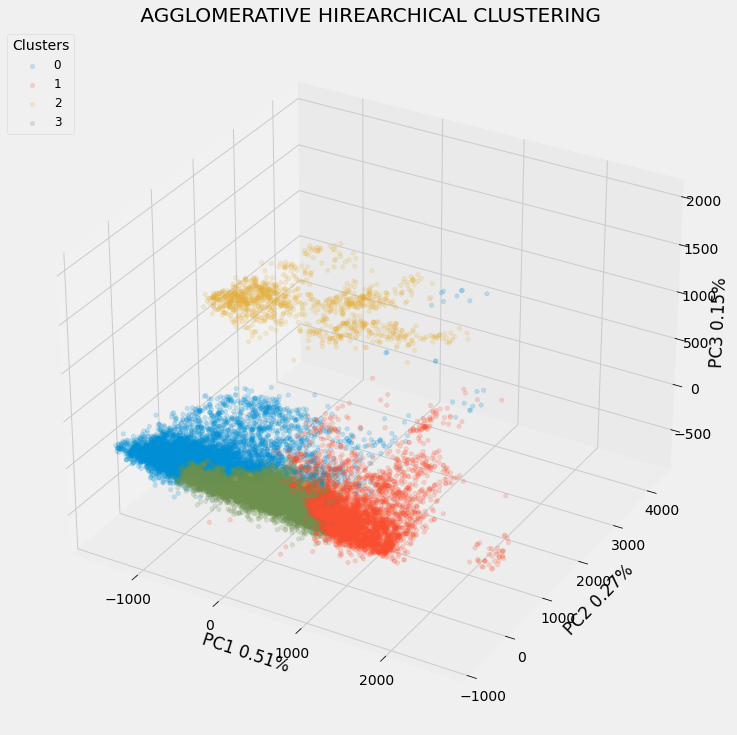

In [152]:
# Frame
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection = '3d') 

for x in list(range(clusters_4.n_clusters)):
    ax.scatter(airlines_pca_kmeans.PCA1[airlines_pca_kmeans.Agglomerative_Hireachical_4 == x],
    airlines_pca_kmeans.PCA2[airlines_pca_kmeans.Agglomerative_Hireachical_4 == x],
    airlines_pca_kmeans.PCA3[airlines_pca_kmeans.Agglomerative_Hireachical_4 == x], label = x, alpha = 0.2)


ax.set(xlabel='PC1 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[0], 2))+"%",
          ylabel='PC2 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[1], 2))+"%",
          zlabel='PC3 '+str(round(pipe_pca_3['preprocessing']['pca'].explained_variance_ratio_[2], 2))+"%",
          title= " AGGLOMERATIVE HIREARCHICAL CLUSTERING")
plt.legend(title="Clusters", fontsize=12,bbox_to_anchor=(0.09, 1))
plt.show()

IN THE GRAPH WE CAN SEE HOW THE 4 CLUSTERS ARE DISTRIBUTED THROUGH THE CUBE. IN HIREARCHICAL CLUSTERING, THE GREEN CLUSTERING IS LOCATED BETWEEN THE BLUE AND RED CLUSTERS, WHILE IN K-MEANS IT IS ABOVE THEM.

## **EXERCISE 3**

**STATEMENT:** Calculate clustering performance using a parameter such as silhouette.

In [153]:
airlines_pca_kmeans.head(3)

,Day,month,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PCA1,PCA2,PCA3,predicted_cluster,Agglomerative_Hireachical_4
0,25,3,19.508766,0.894383,1.296536,1959,1950,2055.0,2050,56.0,60.0,44.0,5.0,9,251,0,0,0,0,0,-900.216650,-494.410171,58.254599,0,0
1,9,8,9.900076,4.929451,1.019566,1152,1130,1555.0,1520,183.0,170.0,153.0,35.0,22,1121,22,0,13,0,0,441.055807,352.221017,-269.214026,1,3
2,13,12,4.239956,0.113464,5.524876,1226,1210,1405.0,1355,99.0,105.0,79.0,10.0,16,528,0,0,0,0,0,511.578596,-262.589171,-86.551545,1,3


In [154]:
# k-means Silhouette
k_means_silhouette = silhouette_score(airlines_pca_kmeans[['PCA1', 'PCA2', 'PCA3']], airlines_pca_kmeans['predicted_cluster']).round(3)

# Hirearchical Clustering Silhouette
hirearchical_clustering_silhouette = silhouette_score(airlines_pca_kmeans[['PCA1', 'PCA2', 'PCA3']], airlines_pca_kmeans['Agglomerative_Hireachical_4']).round(3)

In [155]:
# Silhouette

silhouette = pd.DataFrame({'Clustering Algorithm': ['k-means', 'Hirearchical Clustering'], 'Scores': [k_means_silhouette, hirearchical_clustering_silhouette]})
silhouette

,Clustering Algorithm,Scores
0,k-means,0.449
1,Hirearchical Clustering,0.304


THE BEST PERFORMANCE OF CLUSTERING ALGORITH IS ACHIEVED BY **K-MEANS**